In [1]:
import os.path

import numpy as np
import torch
import pandas as pd
from transformers import AutoTokenizer
from transformers import BertModel
import matplotlib.pyplot as plt

## Phoenix2014

In [2]:
anno_dir = "../data/phoenix2014/phoenix-2014-multisigner/annotations/manual"

In [3]:
corpus = pd.read_csv(os.path.join(anno_dir, "train.corpus.csv"), sep='|', header=0, index_col='id')
corpus

,folder,signer,annotation
id,,,
01April_2010_Thursday_heute_default-0,01April_2010_Thursday_heute_default-0/1/*.png,Signer04,__ON__ LIEB ZUSCHAUER ABEND WINTER GESTERN loc...
01April_2010_Thursday_heute_default-2,01April_2010_Thursday_heute_default-2/1/*.png,Signer04,loc-WEST WARM loc-WEST BLEIBEN KUEHL
01April_2010_Thursday_heute_default-3,01April_2010_Thursday_heute_default-3/1/*.png,Signer04,KUEHL KUEHL IN-KOMMEND NACHT MINUS loc-MINUS-P...
01April_2010_Thursday_heute_default-4,01April_2010_Thursday_heute_default-4/1/*.png,Signer04,MORGEN TEMPERATUR ACHT BIS DREIZEHN MAXIMAL DR...
01April_2010_Thursday_heute_default-6,01April_2010_Thursday_heute_default-6/1/*.png,Signer04,AUCH SAMSTAG WEST FREUNDLICH IX TROCKEN WEST R...
...,...,...,...
31October_2009_Saturday_tagesschau_default-4,31October_2009_Saturday_tagesschau_default-4/1...,Signer03,__ON__ NORD loc-REGION HEUTE NACHT SCHON WOLKE...
31October_2009_Saturday_tagesschau_default-6,31October_2009_Saturday_tagesschau_default-6/1...,Signer03,__ON__ AUCH STURM WEHEN WEHEN NORD SEE STURM l...
31October_2009_Saturday_tagesschau_default-10,31October_2009_Saturday_tagesschau_default-10/...,Signer03,__ON__ MORGEN loc-SECHS GRAD loc-SIEBENZEHN GR...


In [4]:
tokenizer = AutoTokenizer.from_pretrained(
    "../.cache/huggingface/bert-base-german-dbmdz-uncased",
    clean_up_tokenization_spaces=True
)
tokenizer.vocab_size

31102

In [5]:
model = BertModel.from_pretrained("../.cache/huggingface/bert-base-german-dbmdz-uncased")
model.config

BertConfig {
  "_name_or_path": "../.cache/huggingface/bert-base-german-dbmdz-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31102
}

In [6]:
tokenizer.tokenize(corpus.annotation.iloc[0])

['_',
 '_',
 'on',
 '_',
 '_',
 'lieb',
 'zuschauer',
 'abend',
 'winter',
 'gestern',
 'loc',
 '-',
 'nord',
 'schottland',
 'loc',
 '-',
 'region',
 'ueber',
 '##schwe',
 '##mm',
 '##ung',
 'amerika',
 'ix']

In [7]:
encoded = tokenizer.encode(corpus.annotation.iloc[0], truncation=True, padding=True, return_tensors='pt')
encoded

tensor([[  102,  2002,  2002,   861,  2002,  2002,  6930,  6090,  2964,  2827,
          6346,  6039,   223,  1230, 15394,  6039,   223,  1391, 23729, 13049,
          1463,   140,  8491, 18676,   103]])

In [8]:
embedding = model(encoded).last_hidden_state
embedding

tensor([[[ 0.4376,  0.2374,  0.8281,  ...,  0.6385, -0.7208,  0.6743],
         [ 0.7768,  0.4676,  1.3692,  ...,  0.4491, -1.0921,  0.2547],
         [ 0.5351,  1.3192,  1.1783,  ..., -0.1320, -0.4861, -0.2992],
         ...,
         [ 0.7865,  1.0695, -0.0125,  ...,  0.6793, -0.7288, -0.0735],
         [ 0.1505,  0.5297,  0.6863,  ...,  0.5957, -1.0238, -0.3550],
         [ 0.8503,  0.5040,  0.7816,  ...,  0.3721, -0.6425,  0.0720]]],
       grad_fn=<NativeLayerNormBackward0>)

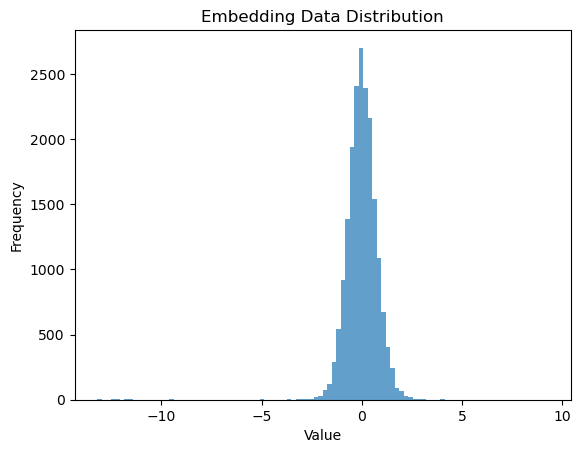

In [9]:
# 直方图查看特性分布
plt.hist(embedding.detach().numpy().flatten(), bins=100, alpha=0.7)
plt.title('Embedding Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [10]:
mean = np.mean(embedding.detach().numpy())
std = np.std(embedding.detach().numpy())
min_val = np.min(embedding.detach().numpy())
max_val = np.max(embedding.detach().numpy())

print(f'Mean: {mean}, Standard Deviation: {std}')
print(f'Minimum: {min_val}, Maximum: {max_val}')


Mean: -0.0018152872798964381, Standard Deviation: 0.8101853728294373
Minimum: -13.198883056640625, Maximum: 9.294820785522461
